Read Dataset and

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados_raw = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Yellow-fever-Febre-Amarela/main/2%20-%20Statistic/yellow_fever_statistic.csv')
dados_raw.head()

,MACRORREG_LPI,UF_LPI,SEXO,IDADE,SE_IS,MES_IS,ANO_IS,OBITO,DIA_IS
0,N,RR,M,19,8,2,1995,0,19
1,NE,MA,M,33,14,4,1995,1,3
2,N,PA,M,26,15,4,1995,1,12
3,N,AM,M,29,4,1,1996,1,26
4,N,AM,M,38,4,1,1996,1,27


In [3]:
dados_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MACRORREG_LPI  2652 non-null   object
 1   UF_LPI         2652 non-null   object
 2   SEXO           2652 non-null   object
 3   IDADE          2652 non-null   int64 
 4   SE_IS          2652 non-null   int64 
 5   MES_IS         2652 non-null   int64 
 6   ANO_IS         2652 non-null   int64 
 7   OBITO          2652 non-null   int64 
 8   DIA_IS         2652 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 186.6+ KB


In [4]:
# !pip install --upgrade category_encoders

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = dados_raw.drop('OBITO', axis = 1)
X

,MACRORREG_LPI,UF_LPI,SEXO,IDADE,SE_IS,MES_IS,ANO_IS,DIA_IS
0,N,RR,M,19,8,2,1995,19
1,NE,MA,M,33,14,4,1995,3
2,N,PA,M,26,15,4,1995,12
3,N,AM,M,29,4,1,1996,26
4,N,AM,M,38,4,1,1996,27
...,...,...,...,...,...,...,...,...
2647,S,SC,M,29,16,4,2021,22
2648,S,SC,M,34,11,3,2021,19
2649,S,SC,F,40,1,1,2021,6
2650,N,PA,M,21,27,7,2021,7


In [7]:
y = dados_raw['OBITO']
y

0       0
1       1
2       1
3       1
4       1
       ..
2647    0
2648    1
2649    0
2650    1
2651    1
Name: OBITO, Length: 2652, dtype: int64

In [8]:
SEED = 1337
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y)

In [9]:
x_train.shape

(2121, 8)

In [10]:
x_test.shape

(531, 8)

In [11]:
!pip install --upgrade category_encoders

In [12]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

In [13]:
encoder = TargetEncoder(cols = ['MACRORREG_LPI','UF_LPI','SEXO']) # Category features

In [14]:
x_train_encoder = encoder.fit_transform(x_train,y_train)

In [15]:
scaler = StandardScaler()

In [16]:
x_train_encoder[['IDADE','MES_IS','ANO_IS','DIA_IS','SE_IS']] = scaler.fit_transform(x_train_encoder[['IDADE','MES_IS','ANO_IS','DIA_IS','SE_IS']]) # Numerical

In [17]:
x_train_encoder.head(15)

,MACRORREG_LPI,UF_LPI,SEXO,IDADE,SE_IS,MES_IS,ANO_IS,DIA_IS
445,0.565567,0.563534,0.398870,-1.182366,-0.447346,-0.571812,-0.004675,1.540279
1511,0.353692,0.350289,0.398870,1.592348,-0.529902,-0.571812,0.491140,0.582164
1319,0.353692,0.352941,0.259259,0.868510,-0.612458,-0.571812,0.491140,-0.735243
148,0.565567,0.563534,0.398870,-0.398208,-0.282233,-0.216773,-2.483752,-0.495715
1843,0.353692,0.350427,0.259259,0.144671,-0.199677,-0.216773,0.491140,0.103107
343,0.565567,0.563534,0.259259,-0.820447,3.515358,3.333614,-1.326850,1.540279
151,0.565567,0.563534,0.398870,-0.639487,-0.199677,-0.216773,-2.483752,-0.256186
234,0.565567,0.500034,0.398870,-1.303006,0.460774,0.493305,-2.318481,-0.615479
1733,0.353692,0.350289,0.398870,0.808190,-0.282233,-0.216773,0.491140,-0.735243
2059,0.353692,0.350289,0.398870,0.868510,-0.529902,-0.571812,0.491140,0.462400


<Axes: >

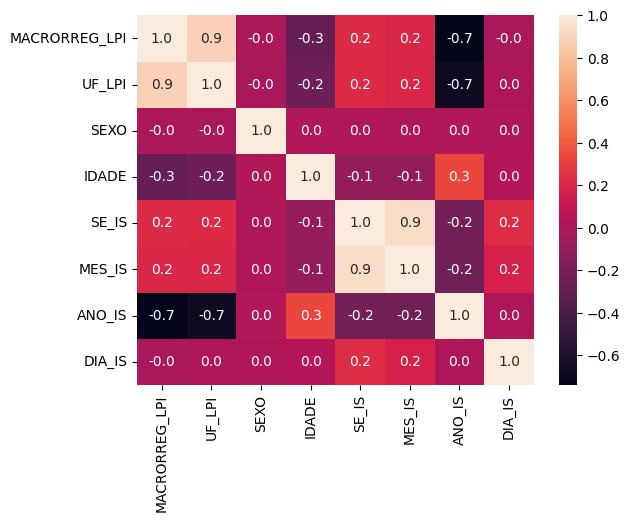

In [18]:
matriz = x_train_encoder.corr(method = 'pearson')
sns.heatmap(matriz, annot = True, fmt = '.1f')

In [19]:
x_train_encoder = x_train_encoder.drop(['MACRORREG_LPI','SE_IS'], axis = 1) # High correlation / Alta correlação
x_train_encoder

,UF_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS
445,0.563534,0.398870,-1.182366,-0.571812,-0.004675,1.540279
1511,0.350289,0.398870,1.592348,-0.571812,0.491140,0.582164
1319,0.352941,0.259259,0.868510,-0.571812,0.491140,-0.735243
148,0.563534,0.398870,-0.398208,-0.216773,-2.483752,-0.495715
1843,0.350427,0.259259,0.144671,-0.216773,0.491140,0.103107
...,...,...,...,...,...,...
2453,0.352941,0.398870,0.627230,0.138266,0.491140,-1.453829
249,0.350289,0.398870,-0.941087,3.333614,-2.153209,0.701928
1823,0.350289,0.259259,-0.096609,-0.216773,0.491140,-0.256186
678,0.377143,0.398870,1.230429,-0.571812,0.325868,0.941457


<Axes: >

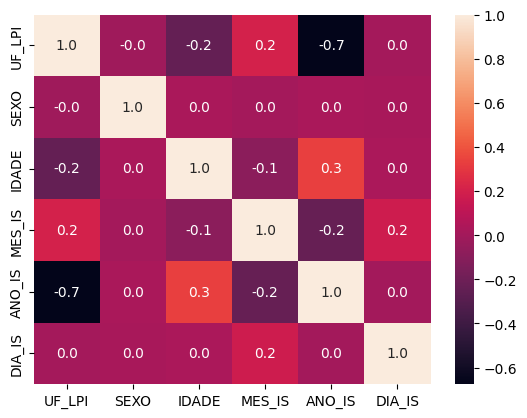

In [20]:
matriz = x_train_encoder.corr(method = 'pearson')
sns.heatmap(matriz, annot = True, fmt = '.1f')

In [21]:
x_test_encoder = encoder.transform(x_test)

In [22]:
x_test_encoder[['IDADE','MES_IS','ANO_IS','DIA_IS','SE_IS']] = scaler.transform(x_test_encoder[['IDADE','MES_IS','ANO_IS','DIA_IS','SE_IS']])

In [23]:
x_test_encoder = x_test_encoder.drop(['MACRORREG_LPI','SE_IS'], axis = 1)

In [24]:
x_test_encoder

,UF_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS
2028,0.350289,0.398870,0.989149,-0.216773,0.491140,-0.375950
2009,0.350289,0.398870,0.325631,-0.216773,0.491140,0.701928
2053,0.352941,0.398870,-0.518848,-0.571812,0.491140,1.180986
2198,0.352941,0.398870,0.446270,-0.216773,0.491140,-0.016657
1359,0.352941,0.398870,-0.337888,-0.571812,0.491140,-0.974772
...,...,...,...,...,...,...
2170,0.350289,0.398870,1.109789,-0.571812,0.491140,0.701928
739,0.350289,0.259259,-0.458528,-0.571812,0.325868,0.222871
2123,0.352941,0.398870,1.049469,-0.216773,0.491140,0.941457
2094,0.350427,0.259259,0.989149,-0.216773,0.491140,-0.974772


In [25]:
train_base = pd.concat([x_train_encoder,y_train], axis = 1)
train_base.to_csv('train_base.csv', index = False)
train_base.head()

,UF_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS,OBITO
445,0.563534,0.398870,-1.182366,-0.571812,-0.004675,1.540279,1
1511,0.350289,0.398870,1.592348,-0.571812,0.491140,0.582164,0
1319,0.352941,0.259259,0.868510,-0.571812,0.491140,-0.735243,1
148,0.563534,0.398870,-0.398208,-0.216773,-2.483752,-0.495715,0
1843,0.350427,0.259259,0.144671,-0.216773,0.491140,0.103107,1


In [26]:
test_base = pd.concat([x_test_encoder, y_test], axis = 1)
test_base.to_csv('test_base.csv', index = False)
test_base.head()

,UF_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS,OBITO
2028,0.350289,0.39887,0.989149,-0.216773,0.49114,-0.375950,0
2009,0.350289,0.39887,0.325631,-0.216773,0.49114,0.701928,0
2053,0.352941,0.39887,-0.518848,-0.571812,0.49114,1.180986,0
2198,0.352941,0.39887,0.446270,-0.216773,0.49114,-0.016657,1
1359,0.352941,0.39887,-0.337888,-0.571812,0.49114,-0.974772,0


# Oversampling

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE(random_state = 1337)

In [29]:
# Aplicar o SMOTE apenas no conjunto de treino
x_train_smote, y_train_smote = smote.fit_resample(x_train_encoder, y_train)

In [30]:
train_base_smote = pd.concat([x_train_smote,y_train_smote], axis = 1)
train_base_smote.to_csv('train_base_smote.csv', index = False)
train_base_smote.head()

,UF_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS,OBITO
0,0.563534,0.398870,-1.182366,-0.571812,-0.004675,1.540279,1
1,0.350289,0.398870,1.592348,-0.571812,0.491140,0.582164,0
2,0.352941,0.259259,0.868510,-0.571812,0.491140,-0.735243,1
3,0.563534,0.398870,-0.398208,-0.216773,-2.483752,-0.495715,0
4,0.350427,0.259259,0.144671,-0.216773,0.491140,0.103107,1


In [31]:
train_base_smote.shape

(2648, 7)

<Axes: xlabel='OBITO', ylabel='count'>

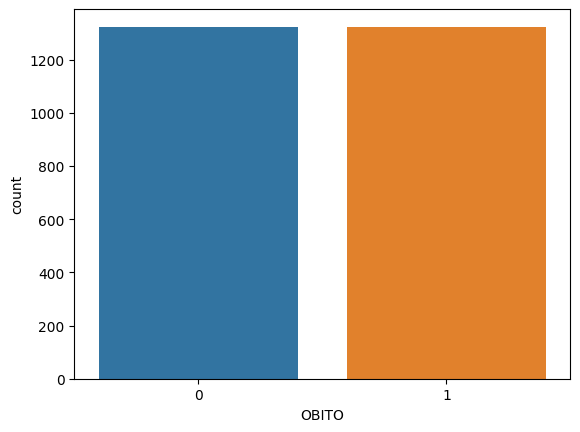

In [32]:
sns.countplot(x = 'OBITO', data = train_base_smote)

In [33]:
train_base.shape

(2121, 7)